# Qualidade da Energia Elétrica (580562)

## Python 3 - Continuação

Sumário:
- 0 - [Janelamento do sinal](#0---Janelamento-do-sinal)
- 1 - [Extração de características](#1---Extração-de-características)
- 2 - [Transformada Rápida de Fourier (FFT) Distorção Harmônica Total (DHT)](#2---Transformada-Rápida-de-Fourier-(FFT)-Distorção-Harmônica-Total-(DHT))
- 3 - [Algoritmos de Machine Learning](#3---Algoritmos-de-Machine-Learning)


### 0 - Janelamento do sinal

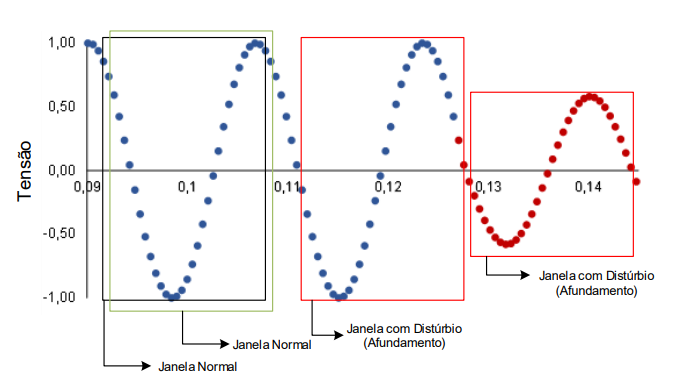

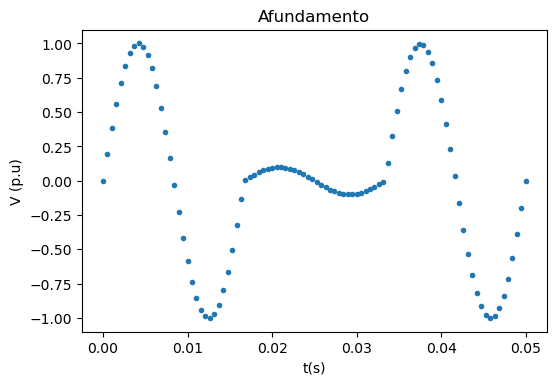

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do sinal fundamental 
n_periodos = 3 
amostras_ciclo = 32 
f = 60

# parâmetros do distúrbio
alpha = 0.9 # aplitude distúrbio = (1-alpha)
t0 = 1*(1/f)
duracao = (1/f)

# sinal fundamental
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w=2.0*np.pi*f
seno = np.sin(w*t)

# distúrbio 
afundamento = (1-alpha*(u(t-t0)-u(t-(t0+duracao))))*seno

# plotando o distúrbio
fig = plt.figure(dpi=100)
plt.plot(t, afundamento,'.')
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Afundamento')
plt.show()

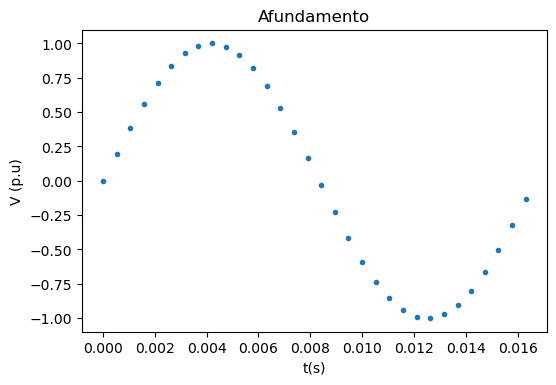

In [4]:
janela_0_afundamento = afundamento[0:32]
janela_t_0 = t[0:32]
fig = plt.figure(dpi=100)
plt.plot(janela_t_0, janela_0_afundamento,'.')
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Afundamento')
plt.show()

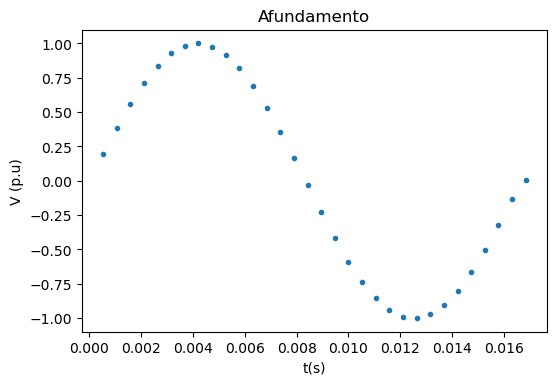

In [5]:
janela_1_afundamento = afundamento[1:33]
janela_t_1 = t[1:33]
fig = plt.figure(dpi=100)
plt.plot(janela_t_1, janela_1_afundamento,'.')
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Afundamento')
plt.show()

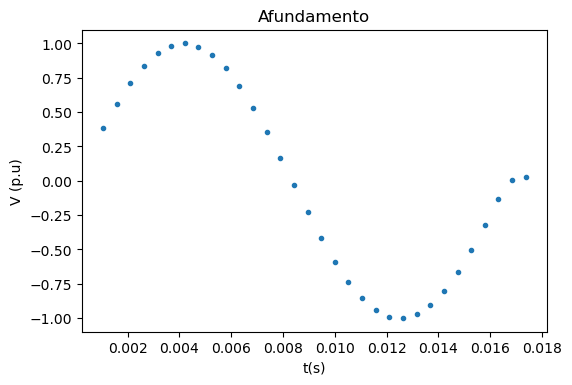

In [6]:
janela_2_afundamento = afundamento[2:34]
janela_t_2 = t[2:34]
fig = plt.figure(dpi=100)
plt.plot(janela_t_2, janela_2_afundamento,'.')
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Afundamento')
plt.show()

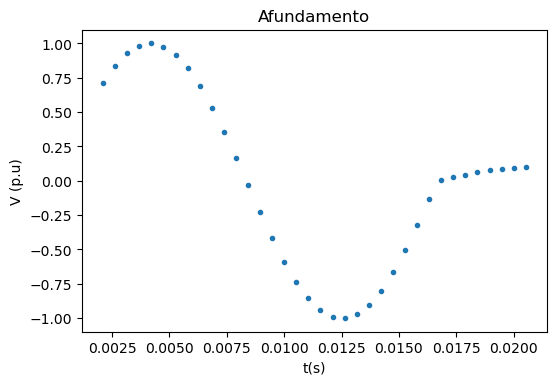

In [8]:
janela_3_afundamento = afundamento[4:35]
janela_t_3 = t[4:35]
fig = plt.figure(dpi=100)
plt.plot(janela_t_3, janela_3_afundamento,'.')
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.title('Afundamento')
plt.show()

### 1 - Extração de características

Algumas ferramentas que podem ser utilizadas para extrair informações de um sinal são:

- Características estatísticas: Média Harmônica (C1), Desvio Padrão (C2), Desvio Médio (C3) e Kurtosis (C4);
- Características de quantidade de informação: Entropia (C5), Entropia de Shannon (C6)
- Características de amplitude do sinal: Valor Eficaz (C8), Valor de Pico (C9) e Diferença entre o maior e o menor valor da janela (C10);
- Característica em frequência: Distorção Harmônica Total (C11).

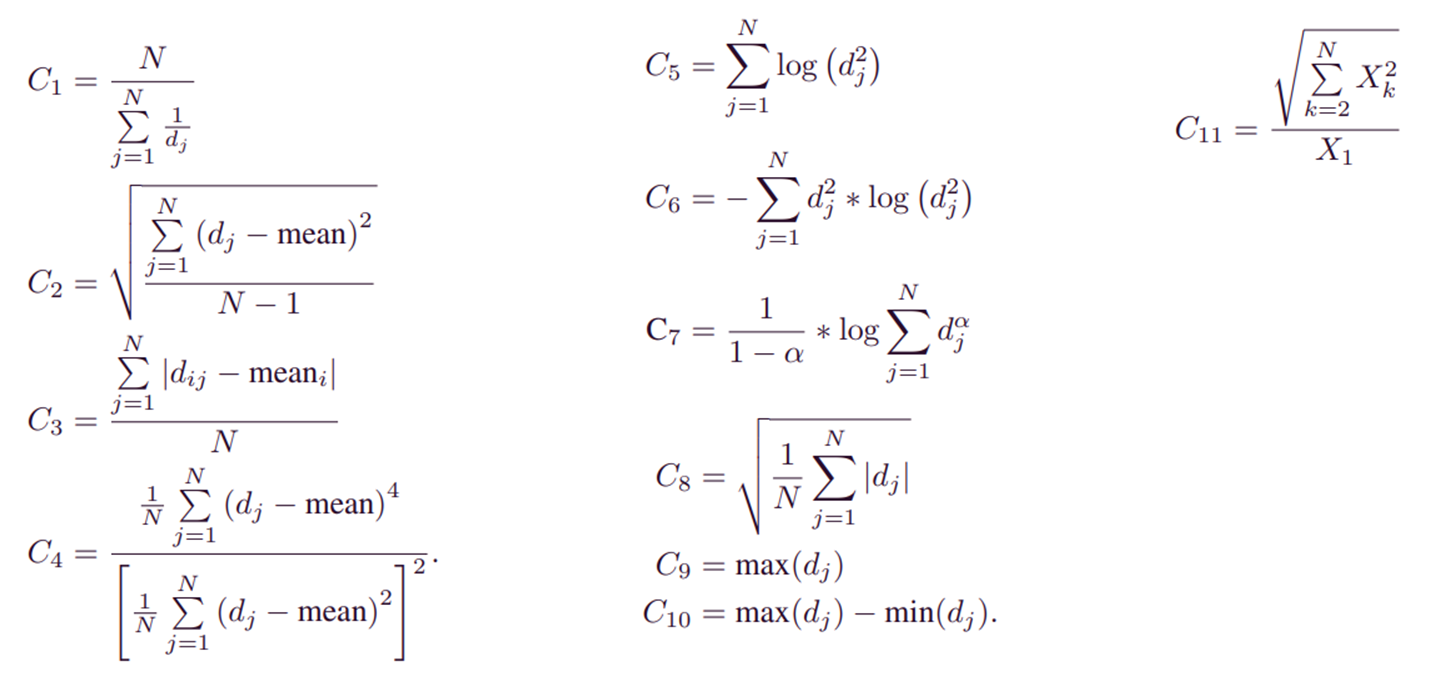

Obs.: Equações retiradas do artigo "Feature Extraction and Power Quality Disturbances Classification Using Smart Meters Signals".

Exemplo:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do sinal fundamental 
n_periodos = 10 
amostras_ciclo = 256 
f = 60

# parâmetros do distúrbio
alpha = 0.9 # aplitude distúrbio = (1-alpha)
t0 = 1*(1/f)
duracao = 7*(1/f)

# sinal fundamental
t = np.linspace(0, n_periodos*(1/f), n_periodos*amostras_ciclo)
w=2.0*np.pi*f
seno = np.sin(w*t)

# distúrbio 
afundamento = (1-alpha*(u(t-t0)-u(t-(t0+duracao))))*seno

janela_0_afundamento = afundamento[0:256]
janela_0_afundamento = np.where(janela_0_afundamento == 0, 10e-11, janela_0_afundamento)

c1 = len(janela_0_afundamento)/np.sum(1.0/janela_0_afundamento)
print('Média Harmônica = ',c1)

Média Harmônica =  2.5600002086611294e-08


###  2 - Transformada Rápida de Fourier (FFT) Distorção Harmônica Total (DHT)

Considere o exemplo abaixo:

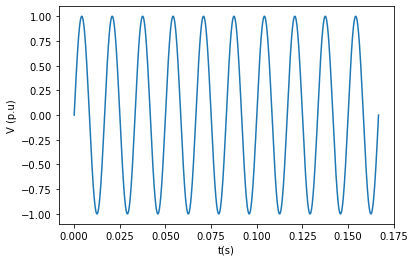

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def fit_sin(t,valorPico,frequencia,faseInicial,nivelDC):
    return valorPico * np.sin(frequencia * 2.0 * np.pi * t + faseInicial) + nivelDC
 
frequencia1 = 60
valorPico = 1.0
nivelDC = 0 
totalPontos = 1280
amostras_ciclo = 128
intervaloAmostragem =  (1/frequencia1)/128
faseInicial = 0.0
 
t = np.linspace(0.0, totalPontos * intervaloAmostragem, totalPontos)
    
result1 =  fit_sin(t,valorPico,frequencia1,faseInicial,nivelDC)

plt.plot(t,result1)
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.show()

array([ 0.00000000e+00,  3.50071882e-01,  6.78768006e-01, ...,
       -6.78768006e-01, -3.50071882e-01, -5.03198798e-14])

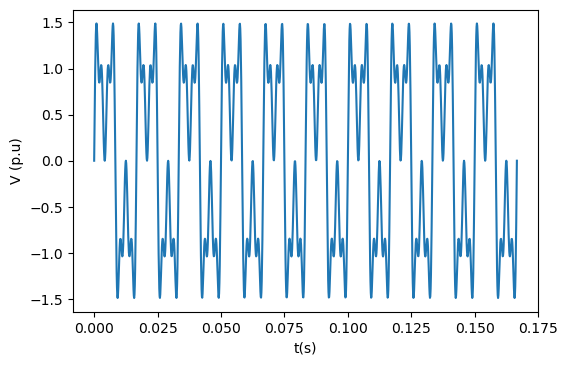

In [10]:
frequencia3 = 3*60
frequencia5 = 5*60
frequencia7 = 7*60

valorPico = 0.8
result3 =  fit_sin(t,valorPico,frequencia3,faseInicial,nivelDC)

valorPico = 0.2
result5 =  fit_sin(t,valorPico,frequencia5,faseInicial,nivelDC)

valorPico = 0.4
result7 =  fit_sin(t,valorPico,frequencia7,faseInicial,nivelDC)

final = result1 + result3 + result5 + result7

plt.figure(dpi =100)
plt.plot(t,final)
plt.xlabel('t(s)')
plt.ylabel('V (p.u)')
plt.show()

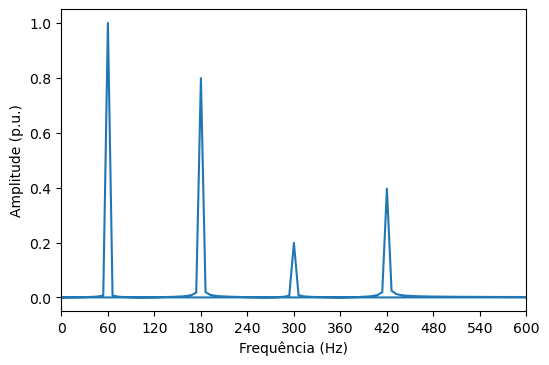

In [8]:
x = abs(np.fft.fft(final))
y = max(x)
z = x/y
freq = np.fft.fftfreq(totalPontos , 1/(frequencia1*amostras_ciclo))
plt.figure(dpi = 100)
plt.xlim([0,10*frequencia1])
plt.xticks(np.arange(0,10*frequencia1+1,60))
plt.plot(freq,z)
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude (p.u.)")
plt.show()

In [9]:
# 3o harmônico
print(freq[30])
print(z[30])
print('\n')

# 5o harmônico
print(freq[50])
print(z[50])
print('\n')

#7o harmônico
print(freq[70])
print(z[70])
print('\n')

180.0
0.798887273155938


300.0
0.19879419722302977


420.0
0.3964764821846217




Qual é a Distorção harmônica total do exemplo retratado anteriormente?

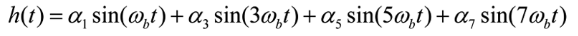

In [11]:
# Cálculo da DHT
DHT = (np.sqrt((z[30]*z[30])+(z[50]*z[50])+(z[70]*z[70])))*100
print(DHT)

91.37470158559053


###  3 - Algoritmos de Machine Learning

- Árvore de Decisão

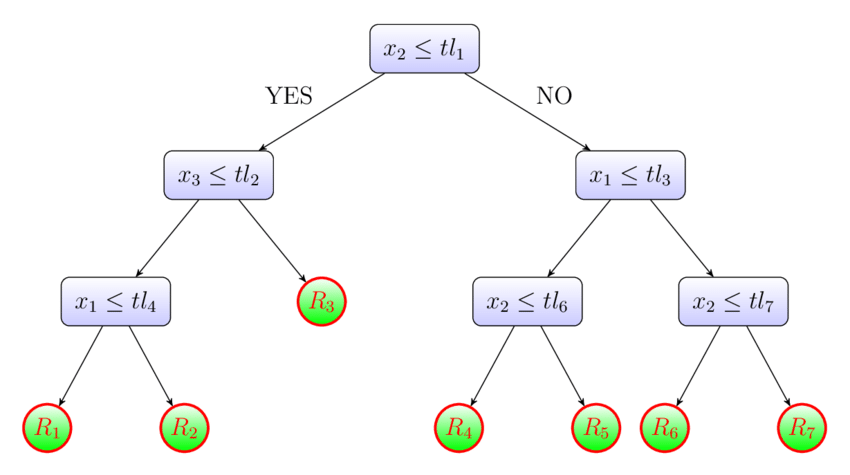

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Carregando os dados
iris = load_iris()
dados = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
dados.head(150)

# Separando em dados de entrada e saída
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = dados[feature_cols] # entrada
y = dados['target'] # saída

# Separando os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% treinamento and 30% teste

# Criando o objeto classificador
clf = DecisionTreeClassifier()

# Treinando o classificador
clf = clf.fit(X_train,y_train)

# Testando o classificador criado
y_pred = clf.predict(X_test)

# Calculando a acurácia do classificador
acc = metrics.accuracy_score(y_test, y_pred)

print("Acurácia(%) :",acc*100)

Acurácia(%) : 95.55555555555556


- Support Vector Machine (SVM)

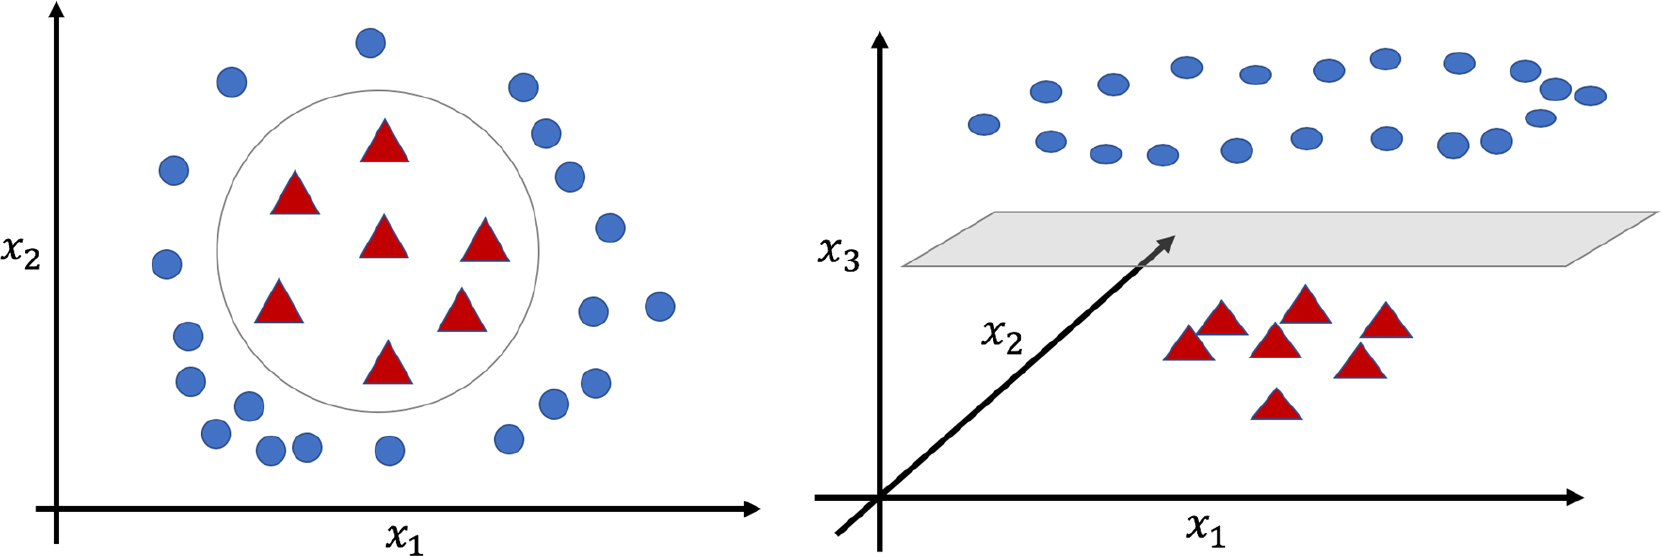

In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Carregando os dados
iris = load_iris()
dados = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
dados.head(150)

# Separando em dados de entrada e saída
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = dados[feature_cols] # entrada
y = dados['target'] # saída

# Separando os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% treinamento and 30% teste

# Criando o objeto classificador
clf = SVC()

# Treinando o classificador
clf = clf.fit(X_train,y_train)

# Testando o classificador criado
y_pred = clf.predict(X_test)

# Calculando a acurácia do classificador
acc = metrics.accuracy_score(y_test, y_pred)

print("Acurácia(%) :",acc*100)

Acuráciaa(%) : 97.77777777777777


- Rede Neural Artificial

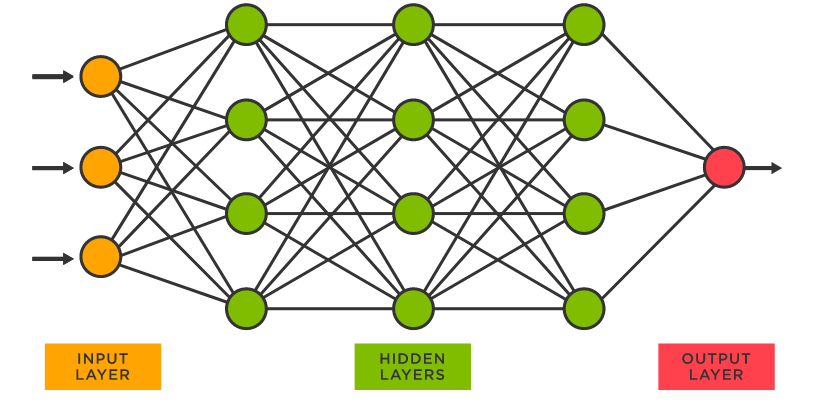

In [77]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Carregando os dados
iris = load_iris()
dados = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
dados.head(150)

# Separando em dados de entrada e saída
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = dados[feature_cols].values # entrada
y = dados['target'].values # saída

# Normalizando os dados
X_norm = preprocessing.normalize(X, axis=0)

# Separando os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1) # 70% treinamento and 30% teste

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Definindo o modelo
model = Sequential()
model.add(Dense(21,activation="tanh",input_shape=(4,)))
model.add(Dense(3, activation="softmax"))
model.summary()

# compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modeo
model.fit(X_train, y_train, epochs=150, batch_size=5, verbose=1)

# Testando o classificador criado
y_pred = model.predict_step(X_test)
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(y_pred,axis=1)

# Calculando a acurácia do classificador
acc = metrics.accuracy_score(y_test, y_pred)
print("Acurácia(%) :",acc*100)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 21)                105       
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 66        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
21/21 [==============================] - 0s 751us/step - loss: 1.0991 - accuracy: 0.3905
Epoch 2/150
21/21 [==============================] - 0s 681us/step - loss: 1.0931 - accuracy: 0.6095
Epoch 3/150
21/21 [==============================] - 0s 683us/step - loss: 1.0878 - accuracy: 0.6857
Epoch 4/150
21/21 [==============================] - 0s 689us/step - loss: 1.0815 - accuracy: 0.6571
Epoch 5/150
21/21 [==============================] - 0s 684us/step - loss: 1.0762 - accuracy: 0.4000
Epoch 6/150


### Exercícios 

1) Criar um algoritmo que carregue uma base de dados contendo vários sinais. Então, o algoritmo deverá realizar o janelamento do sinal e os novos dados em um único arquivo csv. É importante que cada linha do arquivo de saída contenha informações de qual sinal ele se refere da base de dados original e classe de distúrbio.

2) Criar um algoritmo que carregue uma base de dados contendo vários sinais, extraia as 11 características abordadas nessa aula e salve os dados em um único arquivo csv.

3) Escolher um dos algoritmos visto em aula e realizar, importar o  dataset wine do scikit-learn e realizar a classificação dos dados (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).